# Setting up the Location


In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import requests
import io

In [2]:
url = (
    'https://storage.googleapis.com/earthenginepartners-hansen/GFC-2019-v1.7/'
    'Hansen_GFC-2019-v1.7_treecover2000_50N_010E.tif')

In [3]:
Image.MAX_IMAGE_PIXELS = None
data_tile = np.array(
    Image.open(
        io.BytesIO(
            requests.get(url).content)))


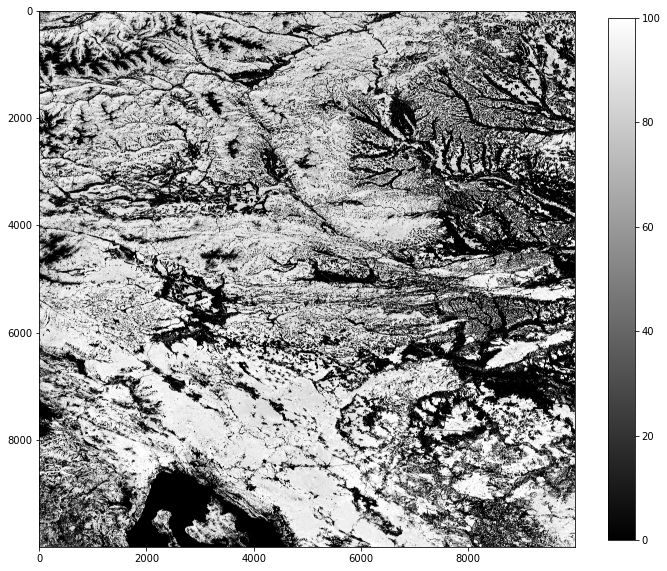

In [4]:
# 10,000 x 10,000 grid
plt.figure(figsize=(12, 12))
plt.imshow(data_tile[10000:20000, 15000:25000], cmap='gray')
plt.colorbar(shrink=0.8)
plt.show()

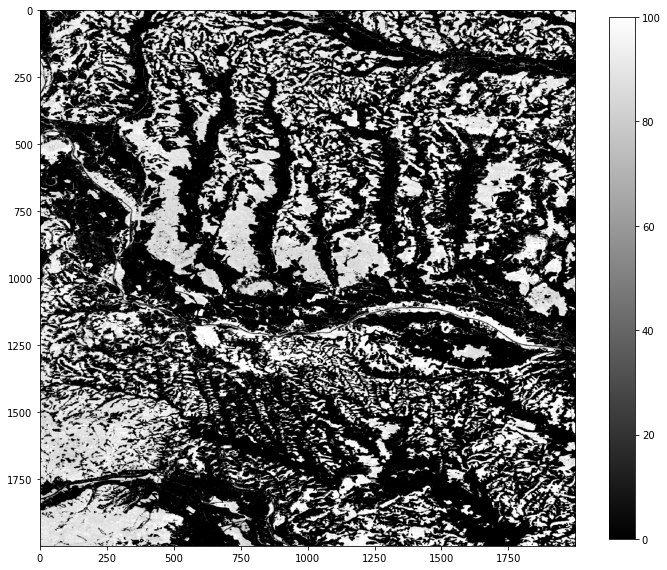

In [5]:
#2000 x 2000 grid 
plt.figure(figsize=(12, 12))
plt.imshow(data_tile[12000:14000, 22000:24000], cmap='gray')
plt.colorbar(shrink=0.8)
plt.show()

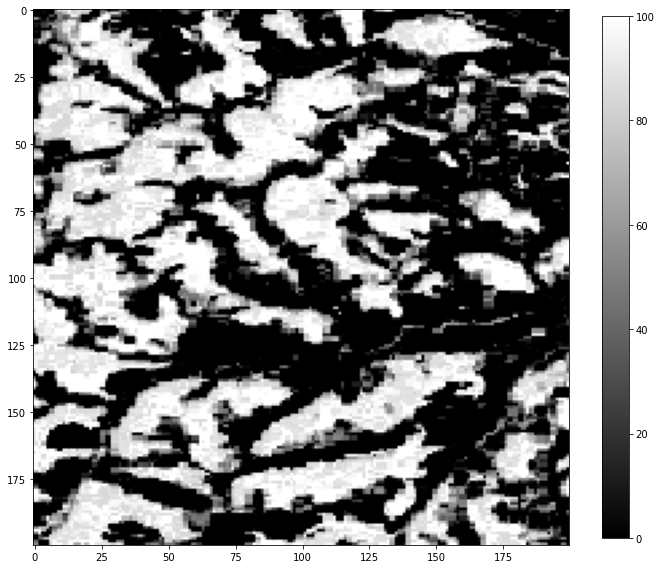

In [6]:
#200 x 200 grid 
plt.figure(figsize=(12, 12))
plt.imshow(data_tile[13000:13200, 22000:22200], cmap='gray')
plt.colorbar(shrink=0.8)
plt.show()

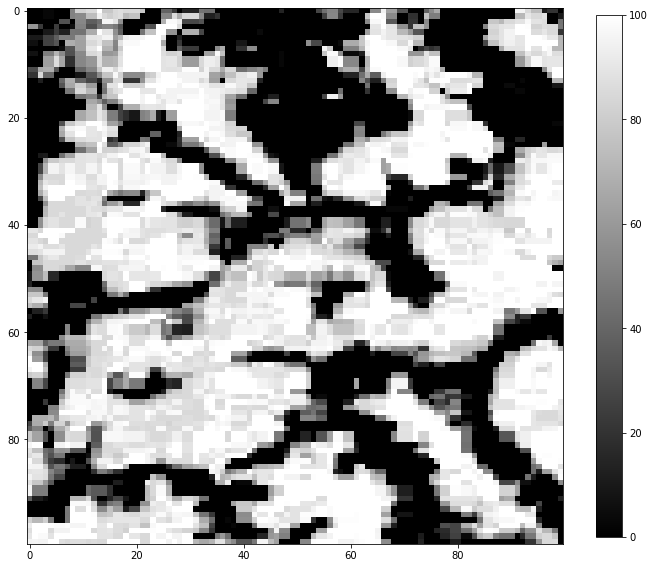

In [7]:
# 100 x 100 grid
plt.figure(figsize=(12, 12))
plt.imshow(data_tile[13000:13100, 22000:22100], cmap='gray')
plt.colorbar(shrink=0.8)
plt.show()

In [8]:
np.random.seed(243)

# Class Simulation - Non Linearity of Tree Density and Percolation

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

class ForestFireSimulation:
    empty, tree, fire, char = [0, 1, 2, 3]  # Setup state values
    
    def __init__(self, size=50):
        self.size = size
        self.state = np.zeros((size, size))

    def initialize(self, tree_density=0.4):
        self.state.fill(self.empty)

        random_indexes = np.random.choice(
            range(self.size ** 2),
            size=int(round(tree_density * self.size ** 2)),
            replace=False)
        self.state.flat[random_indexes] = self.tree

        # Ignite one random tree
        if len(random_indexes) > 0:
            self.state.flat[random_indexes[0]] = self.fire
        self.time_step = 0
        self.changed = True  # Track whether the state changed between the
                             # previous time step and the current one

    def draw(self):
        plt.cla()
        plt.pcolor(self.state, vmin = 0, vmax = 3, cmap = plt.cm.binary)
        plt.axis('image')
        plt.title('t = ' + str(self.time_step))

    def update(self):
        self.time_step += 1
        next_state = np.zeros(self.state.shape)
        next_state[np.where(self.state == self.empty)] = self.empty
        # Charred cells stay charred
        next_state[np.where(self.state == self.char)] = self.char
        # Burning cells become charred
        next_state[np.where(self.state == self.fire)] = self.char
        # Check which trees should be ignited (all those with fire neighbors)
        ys, xs = np.where(self.state == self.tree)
        fire_neighbor = np.zeros(len(xs), dtype=bool)
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                fire_neighbor = fire_neighbor | (
                    self.state[(ys + dy) % self.size, (xs + dx) % self.size] == self.fire)
        # Trees with burning neighbors start burning
        next_state[(ys[fire_neighbor], xs[fire_neighbor])] = self.fire
        # Trees without burning neighbors stay the same
        next_state[(ys[~fire_neighbor], xs[~fire_neighbor])] = self.tree
        self.changed = (next_state != self.state).any()
        self.state = next_state
        
        
        


  0%|          | 0/101 [00:00<?, ?it/s]

[[0.0, 0.0], [0.01, 0.0424], [0.02, 0.0208], [0.03, 0.015733333333333332], [0.04, 0.012600000000000002], [0.05, 0.01072], [0.06, 0.0104], [0.07, 0.00982857142857143], [0.08, 0.009399999999999999], [0.09, 0.010666666666666666], [0.1, 0.009280000000000002], [0.11, 0.008945454545454545], [0.12, 0.0078000000000000005], [0.13, 0.009476923076923075], [0.14, 0.0092], [0.15, 0.012000000000000002], [0.16, 0.01095], [0.17, 0.01091764705882353], [0.18, 0.0084], [0.19, 0.009642105263157893], [0.2, 0.012599999999999998], [0.21, 0.012838095238095239], [0.22, 0.01429090909090909], [0.23, 0.015547826086956523], [0.24, 0.017933333333333332], [0.25, 0.017056], [0.26, 0.016246153846153844], [0.27, 0.023674074074074073], [0.28, 0.03437142857142857], [0.29, 0.033158620689655166], [0.3, 0.02346666666666667], [0.31, 0.04023225806451612], [0.32, 0.054049999999999994], [0.33, 0.06758787878787878], [0.34, 0.08971764705882355], [0.35, 0.1299657142857143], [0.36, 0.15695555555555557], [0.37, 0.23388108108108108],

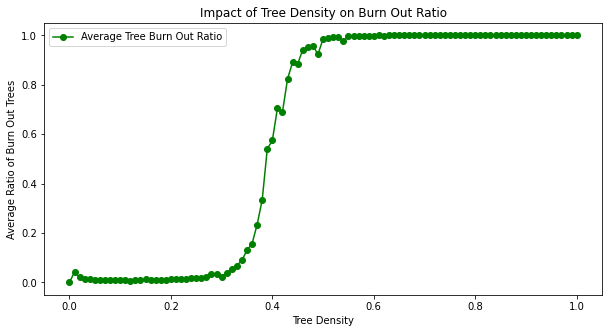

In [10]:
forest_fire_sim = ForestFireSimulation()

def run_simulation_for_density(density, trials=50):
    def simulate_once():
        forest_fire_sim.initialize(density)
        while forest_fire_sim.changed:
            forest_fire_sim.update()
        return np.mean(forest_fire_sim.state == forest_fire_sim.char) / density if density else 0

    results = [simulate_once() for _ in range(trials)]
    return np.mean(results)

# Generate tree densities and simulate
density_values = np.round(np.linspace(0, 1, 101), 2)
density_results = [[density, run_simulation_for_density(density)] for density in tqdm(density_values)]

print(density_results)

# Function to plot results
def plot_results(data):
    plt.figure(figsize=(10, 5))
    densities = [item[0] for item in data]  # Extract densities
    results = [item[1] for item in data]  # Extract results
    plt.plot(densities, results, 'o-', color='green', label='Average Tree Burn Out Ratio')
    plt.title('Impact of Tree Density on Burn Out Ratio')
    plt.xlabel('Tree Density')
    plt.ylabel('Average Ratio of Burn Out Trees')
    plt.legend()
    plt.show()

# Call plot function with the modified structure of data
plot_results(density_results)

# Building a Simulation


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from tqdm.notebook import tqdm

class Wind:
    def __init__(self, direction, strength):
        '''
        This class creates an instance of Wind object that can 
        
        ------------------
        Parameters:
        direction:
            The current wind direction, which can take any of the 8 potential options. 
            
        strength (int):
            The current wind strenght. 
        
        wind_directions (dict):
            Represents a dictionary containing 8 potnetial wind directions with the values being their coordinate changes
        '''
        self.direction = direction
        self.strength = strength
        self.wind_directions = {
            'N': (0, 1), 
            'S': (0, -1), 
            'E': (-1, 0), 
            'W': (1, 0),
            'NW': (-1, 1), 
            'SW': (-1, -1), 
            'NE': (1, 1), 
            'SE': (1, -1)
        }
        
    def change_wind_properties(self):
        '''
        This method allows for the randomness of the weather by changing the wind strength and direction
        with a 10% for each.
        Including  np.random.randint(-3, 3) allows for the decrease in the strength of the wind as well as the increase. 
        '''

        if np.random.random() < 0.1:
            self.direction = np.random.choice(list(self.wind_directions.keys()))
        if np.random.random() < 0.1:
            self.strength = max(0, self.strength + np.random.randint(-3, 3))

            
            
class ForestFireImproved:
    no_fire, burning, charcoal = range(3)

    def __init__(self, tree_density_data, wind):
        '''
        This Class creates the instance of the simulation that allows to observe the spread of the fire 
        based on the neighborhood, wind strength, direction, and the direction of the adjacent cell. 
        
        ------------------
        Parameters:
        tree_density_grid (np.array):
            A grid where each cell has a corresponding tree density value, which is scaled down by dividing by 100. 
        width (int):
            A width of the grid that corresponds to the shape of the data tile. 
        height (int):
            A height of the grid that corresponds to the shape of the data tile. 
        config (np.array):
            Current states of the grid cells which do not take any state values as of now. 
        next_config (np.array):
            Temporary storage for the next state of the cells. 
        step_counter (int):
            A counter for the simulation steps. 
        new_burning_cells (list):
            Tracks the number of new cells that start burning at each step. 
        
        '''
        self.tree_density_grid = tree_density_data / 100  # converting percentage to a scale of 0 to 1
        self.width = tree_density_data.shape[1]
        self.height = tree_density_data.shape[0]
        self.wind = wind
        self.config = np.zeros((self.height, self.width), dtype=int)
        self.next_config = np.zeros_like(self.config)
        self.step_counter = 0
        self.figure, self.axes = plt.subplots(figsize=(10, 10))
        self.new_burning_cells = []

    def start_fire(self):
        '''   
        This method allows for the ignition of the random cell by chaning its state to burning
        '''
        x, y = np.random.randint(0, self.height), np.random.randint(0, self.width)
        self.config[x, y] = self.burning

    def fire_spread_probability(self, tree_density, dx, dy):
        
        '''
        Calculates the probability that a fire will spread to a neighboring cell based on 
        tree density and wind conditions.
         
        -----------------
        Parameters:
        tree_density (float): 
            Density of the tree in the neighboring cell ranging from 0 to 1 as a function of tree density.
        dx (int): 
            Horizontal distance (delta x) between the burning cell and the neighboring cell.
        dy (int): 
            Vertical distance (delta y) between the burning cell and the neighboring cell.

        Returns:
        final_probability (float)
            The calculated probability that the fire will spread to the neighboring cell.
        '''
        
        base_prob=next((item[1] for item in density_results if item[0] == tree_density))
        wind_dx, wind_dy = self.wind.wind_directions[self.wind.direction]
        wind_magnitude = (wind_dx**2 + wind_dy**2)**0.5
        normalized_wind_dx = wind_dx / wind_magnitude # normalizing the wind vector x component
        normalized_wind_dy = wind_dy / wind_magnitude # normalizing the wind vector y component
        alignment_factor = normalized_wind_dx * dx + normalized_wind_dy * dy # alignment of wind and cell direction
        wind_adjustment_rate = 0.1 * self.wind.strength * alignment_factor # wind's effect on spread probability        
        final_probability = base_prob * (1 + wind_adjustment_rate)
        return final_probability

    def update(self):
        '''
        Update the forest fire simulation by one step: changing wind properties, spreading the fire, and updating cell states.

        This method simulates the progression of a forest fire for a single time step. It updates the wind properties,
        checks each cell to see if it is burning, and attempts to spread the fire to neighboring cells based on
        the calculated probabilities.
        
        '''

        self.wind.change_wind_properties()
        new_burning_count = 0
        self.next_config[:, :] = self.config
        for x in range(self.height):
            for y in range(self.width):
                if self.config[x, y] == self.burning: # check if the current cell is burning
                    self.next_config[x, y] = self.charcoal
                    for dx in range(-1, 2): #iterate over the moore neighborhood of 8 cells
                        for dy in range(-1, 2):
                            if dx == 0 and dy == 0:
                                continue
                            nx, ny = (x + dx), (y + dy)
                            if 0 <= nx < self.height and 0 <= ny < self.width and self.config[nx, ny] == self.no_fire:
                                spread_prob = self.fire_spread_probability(self.tree_density_grid[nx, ny], dx, dy)
                                if np.random.random() < spread_prob:
                                    self.next_config[nx, ny] = self.burning # set the cell to burning if the probability check passes
                                    new_burning_count += 1 # increment the count of new burning cells
        self.new_burning_cells.append(new_burning_count)
        self.config, self.next_config = self.next_config, np.zeros_like(self.config)
        self.step_counter += 1
        
    def plot_fire_spread_rate(self):
        '''
        Plot the rate of new burning cells over the simulation time which allows to see 
        the rate of the fire spread.
        
        '''
        plt.figure(figsize=(10, 8))
        plt.plot(self.new_burning_cells, color = "navy", label='New Burning Cells per Step')
        plt.xlabel('Simulation Step')
        plt.ylabel('Number of New Burning Cells')
        plt.title('Fire Growth Rate Over Time')
        plt.legend()
        plt.show()


    def cells_at_risk(self):
        '''
        This method calculates and return a grid of cells that are at risk of catching fire or are burning.
        As defined in the instructions of the assignment, the cells at risk are the ones who are burnt or 
        the adjacent cells to the burnt ones. 
        
        '''
        #calculate all the burnt cells and the adjacent cells to it as affected or at risk
        affected_area = np.zeros_like(self.config, dtype=bool)
        charcoal_cells = np.where(self.config == self.charcoal)
        affected_area[charcoal_cells] = True

        # marking all neighboring cells of burnt cells as affected
        for x, y in zip(*charcoal_cells):
            for dx in range(-1, 2): 
                for dy in range(-1, 2): 
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < self.width and 0 <= ny < self.height:
                        affected_area[nx, ny] = True

        cells_at_risk_count = np.sum(affected_area)
        return affected_area

    
    def observe(self):
        '''
        Plots the current state of the forest fire on the grid.
        '''
        self.axes.clear()
        plot = self.axes.imshow(self.config, cmap='gist_heat')
        self.axes.set_title(f"Forest Fire Simulation Step: {self.step_counter}")
        return plot

    
    def total_burned_area(self):
        '''
        Calculates and returns the total area that has been burned which is defined by the state
        of the cell being set to "charcoal"
        '''
        return np.sum(self.config == self.charcoal)
    
    
    def fire_stopped_spreading(self):
        '''
        Check if the fire has stopped spreading by checking the status of each cell, and checking whether 
        none of them is "burning"
        '''
        return not np.any(self.config == self.burning)

    def close_figure(self):
        '''
        This method closes the matplotlib figure to avoid a lot of plots
        '''
        plt.close(self.figure)

        
        
        
def make_animation(sim, total_frames, steps_per_frame=1, interval=100):
    def update(frame_number):
        for _ in range(steps_per_frame):
            sim.update()
        progress_bar.update(1)
        return [sim.observe()]

    sim.start_fire()
    progress_bar = tqdm(total=total_frames)
    animation = FuncAnimation(sim.figure, update, init_func=lambda: [], frames=total_frames, interval=interval)
    output = HTML(animation.to_html5_video())
    sim.figure.clf()
    return output

    

data_tile_region = data_tile[13000:13100, 22000:22100]
wind = Wind(direction='S', strength=3)
sim = ForestFireImproved(data_tile_region, wind)
make_animation(sim, total_frames=100, steps_per_frame=1)

  0%|          | 0/100 [00:00<?, ?it/s]

<Figure size 720x720 with 0 Axes>

/Users/katerynaivaniuk/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


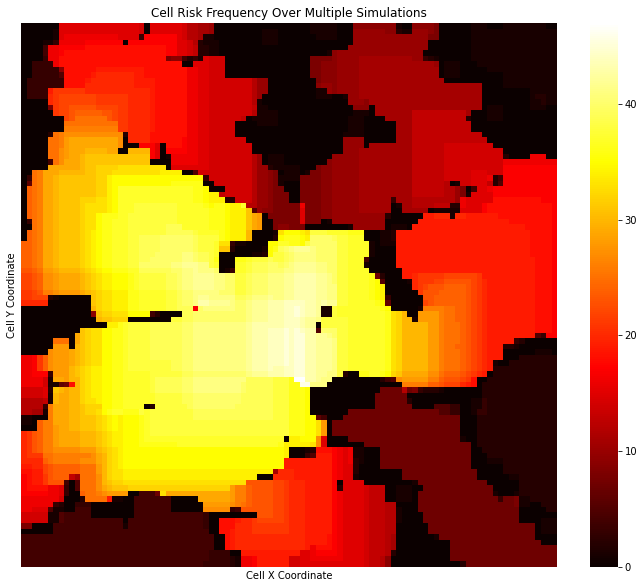

In [12]:
import seaborn as sns

def run_forest_fire_simulations(num_simulations, tree_density_data, wind_direction='S', wind_strength=3):
    risk_map = np.zeros_like(tree_density_data, dtype=int)
    for _ in range(num_simulations):
        wind = Wind(direction=wind_direction, strength=wind_strength)
        sim = ForestFireImproved(tree_density_data, wind)
        sim.start_fire()
        for _ in range(num_steps):
            sim.update()
        affected_area = sim.cells_at_risk()
        risk_map += affected_area.astype(int)  # Convert Boolean to int and accumulate
        sim.close_figure()  # Close the figure to prevent memory leak

    return risk_map

def plot_risk_map(risk_map):
    plt.figure(figsize=(12, 10))
    sns.heatmap(risk_map, cmap='hot', xticklabels=False, yticklabels=False)
    plt.title('Cell Risk Frequency Over Multiple Simulations')
    plt.xlabel('Cell X Coordinate')
    plt.ylabel('Cell Y Coordinate')
    plt.show()

num_steps = 50
num_simulations = 100
risk_map = run_forest_fire_simulations(num_simulations, data_tile_region, 'S', 3)
plot_risk_map(risk_map)


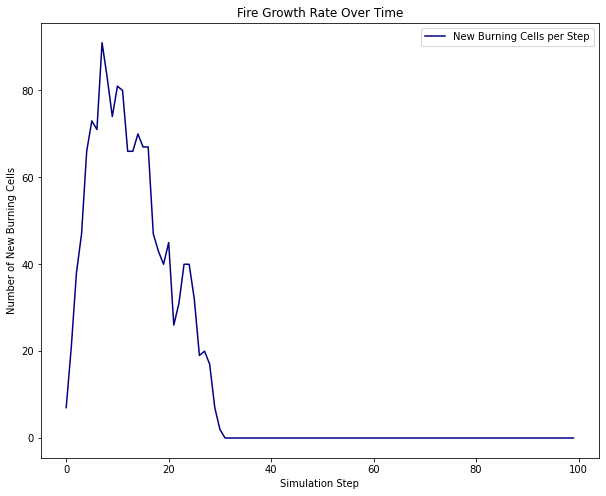

In [13]:
sim.plot_fire_spread_rate()

# Testing


......
----------------------------------------------------------------------
Ran 6 tests in 0.046s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

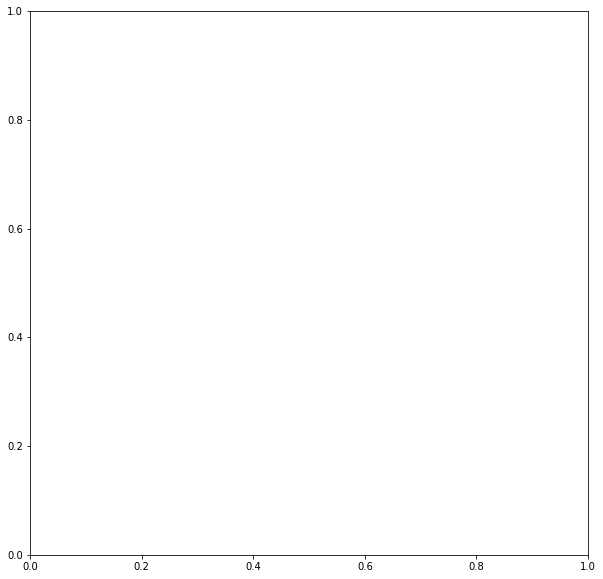

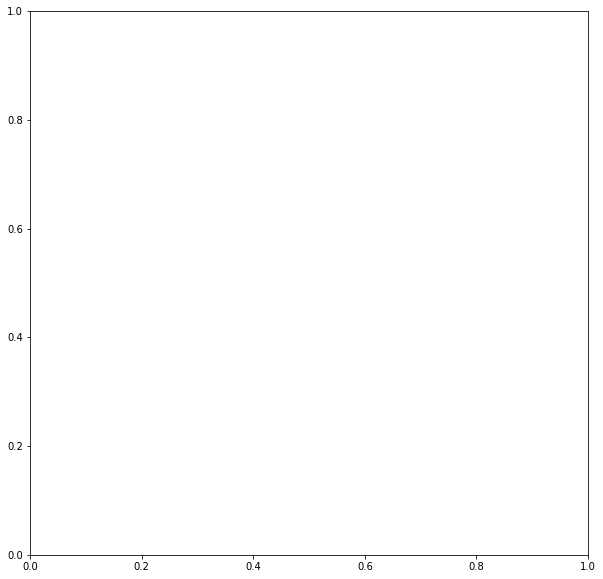

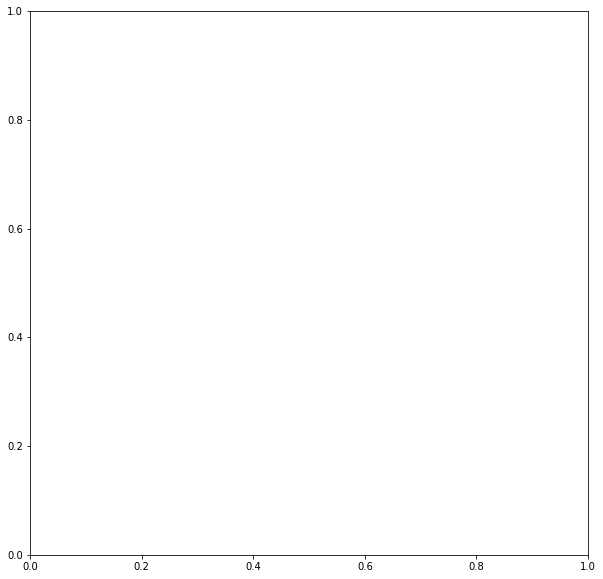

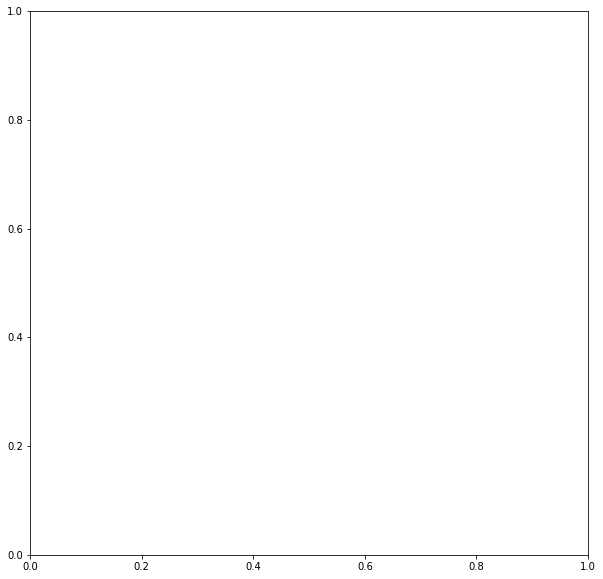

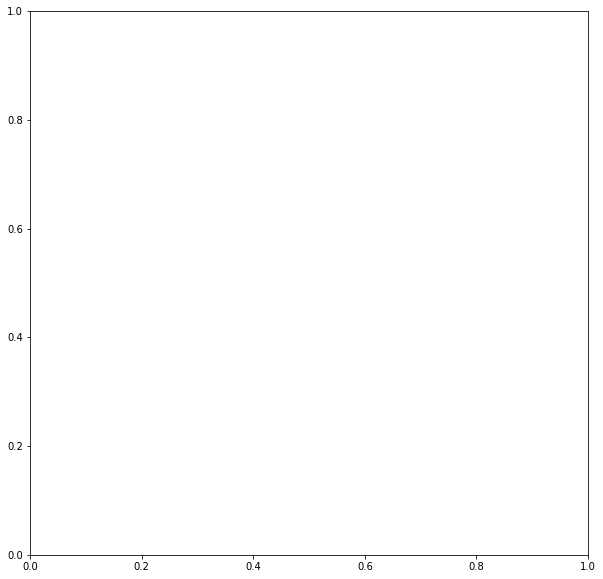

In [14]:
import unittest
import numpy as np

class TestWind(unittest.TestCase):
    def test_change_wind_properties(self):
        wind = Wind('N', 5)
        original_direction, original_strength = wind.direction, wind.strength
        for _ in range(100):  
            wind.change_wind_properties()
            if wind.direction != original_direction or wind.strength != original_strength:
                break
        self.assertNotEqual((original_direction, original_strength), (wind.direction, wind.strength))

class TestForestFireSimulator(unittest.TestCase):
    def setUp(self):
        self.tree_density_data = np.full((10, 10), 50)  
        self.wind = Wind('N', 5)  
        self.sim = ForestFireImproved(self.tree_density_data, self.wind)
    
    def test_start_fire(self):
        self.sim.start_fire()
        self.assertEqual(np.sum(self.sim.config == self.sim.burning), 1)

    def test_fire_spread_probability(self):
        prob = self.sim.fire_spread_probability(0.5, 0, 0)  
        self.assertNotEqual(prob, 0.5)

    def test_update(self):
        self.sim.start_fire()
        initial_burning = np.sum(self.sim.config == self.sim.burning)
        self.sim.update()
        self.assertTrue(np.sum(self.sim.config == self.sim.burning) > initial_burning)

    def test_cells_at_risk(self):
        self.sim.start_fire()
        self.sim.update()
        risk_area = self.sim.cells_at_risk()
        self.assertTrue(np.any(risk_area))

    def test_fire_stopped_spreading(self):
        self.sim.config.fill(self.sim.burning)
        self.sim.update()  
        self.assertTrue(self.sim.fire_stopped_spreading())

        
suite = unittest.TestSuite()
suite.addTest(TestWind('test_change_wind_properties'))
suite.addTest(TestForestFireSimulator('test_start_fire'))
suite.addTest(TestForestFireSimulator('test_update'))
suite.addTest(TestForestFireSimulator('test_fire_spread_probability'))
suite.addTest(TestForestFireSimulator('test_cells_at_risk'))
suite.addTest(TestForestFireSimulator('test_fire_stopped_spreading'))
runner = unittest.TextTestRunner()
runner.run(suite)


# Strategies to Prevent Fire Spread


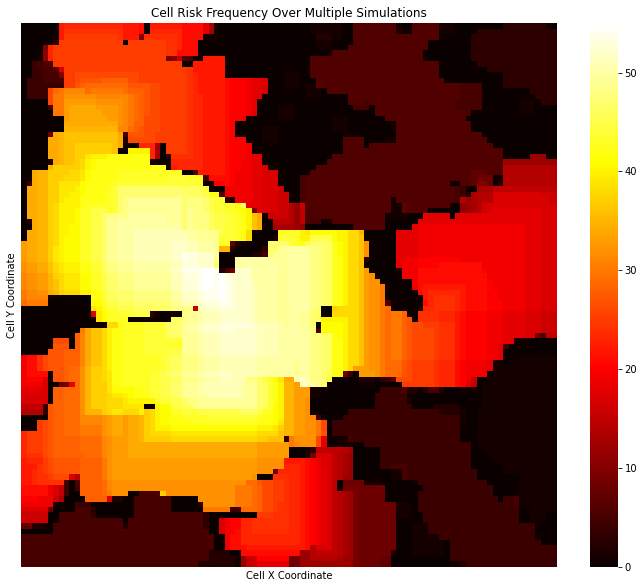

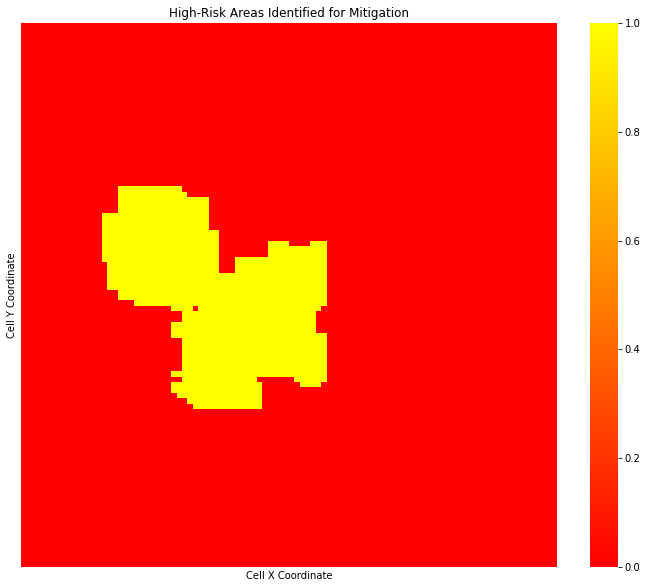

In [15]:

def run_forest_fire_simulations(num_simulations, tree_density_data, wind_direction='S', wind_strength=3):
    risk_map = np.zeros_like(tree_density_data, dtype=int)
    
    for _ in range(num_simulations):
        # Create a Wind object with the given direction and strength
        wind = Wind(direction=wind_direction, strength=wind_strength)
        # Initialize the ForestFireSimulator with the Wind object and current tree density data
        sim = ForestFireImproved(tree_density_data.copy(), wind)
        sim.start_fire()
        for _ in range(num_steps):
            sim.update()
            
        affected_area = sim.cells_at_risk()
        risk_map += affected_area.astype(int)  
        sim.close_figure()  

    threshold = np.percentile(risk_map, 90)  # Find the 90th percentile, top 10% risk
    high_risk_cells = risk_map >= threshold
    tree_density_data[high_risk_cells] = 0  # Zero out the tree density in these areas
    
    return risk_map, high_risk_cells

def plot_risk_map(risk_map, high_risk_cells):
    plt.figure(figsize=(12, 10))
    sns.heatmap(risk_map, cmap='hot', xticklabels=False, yticklabels=False)
    plt.title('Cell Risk Frequency Over Multiple Simulations')
    plt.xlabel('Cell X Coordinate')
    plt.ylabel('Cell Y Coordinate')
    plt.show()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(high_risk_cells, cmap='autumn', xticklabels=False, yticklabels=False)
    plt.title('High-Risk Areas Identified for Mitigation')
    plt.xlabel('Cell X Coordinate')
    plt.ylabel('Cell Y Coordinate')
    plt.show()


num_steps = 50
num_simulations = 100
risk_map, high_risk_cells= run_forest_fire_simulations(num_simulations, data_tile_region.copy(), 'S', 3)
plot_risk_map(risk_map, high_risk_cells)


# Comparison of Strategy 1 and No Intervention

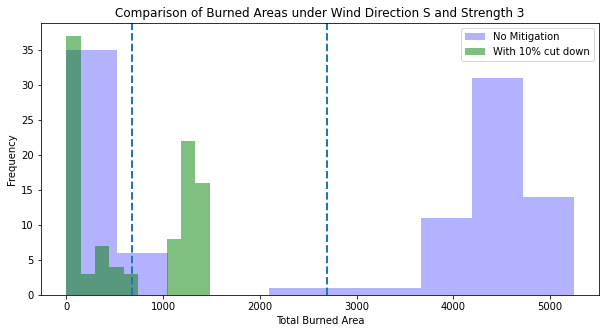

In [16]:
import numpy as np
from scipy.stats import sem, t


def run_forest_fire_simulations(num_simulations, tree_density_data, wind_direction='S', wind_strength=3, apply_mitigation=False):
    risk_map = np.zeros_like(tree_density_data, dtype=int)
    total_burned_areas = []
    
    for i in range(num_simulations):
        # Create a Wind object with the given direction and strength
        wind = Wind(direction=wind_direction, strength=wind_strength)
        # Initialize the ForestFireSimulator with the Wind object and current tree density data
        sim = ForestFireImproved(tree_density_data.copy(), wind)
        sim.start_fire()
        for _ in range(num_steps):
            sim.update()
            
        total_burned_areas.append(sim.total_burned_area())

        affected_area = sim.cells_at_risk()
        risk_map += affected_area.astype(int)  
        sim.close_figure()  

    # Calculate the mean and 95% confidence interval for the burned area
    mean_area = np.mean(total_burned_areas)
    std_error = sem(total_burned_areas)
    confidence_interval = t.interval(0.95, len(total_burned_areas) - 1, loc=mean_area, scale=std_error)
    
    if apply_mitigation:
        threshold = np.percentile(risk_map, 90)  # Find the 90th percentile, top 10% risk
        high_risk_cells = risk_map >= threshold
        tree_density_data[high_risk_cells] = 0  # Zero out the tree density in these areas

        total_burned_areas_mitigated = []
        for i in range(num_simulations):
            wind = Wind(direction=wind_direction, strength=wind_strength)
            sim = ForestFireImproved(tree_density_data.copy(), wind)
            sim.start_fire()
            for _ in range(num_steps):
                sim.update()

            total_burned_areas_mitigated.append(sim.total_burned_area())
            sim.close_figure()
        
        # Calculate the mean and 95% confidence interval for the mitigated burned area
        mean_area_mitigated = np.mean(total_burned_areas_mitigated)
        std_error_mitigated = sem(total_burned_areas_mitigated)
        confidence_interval_mitigated = t.interval(0.95, len(total_burned_areas_mitigated) - 1, loc=mean_area_mitigated, scale=std_error_mitigated)
        
        return risk_map, high_risk_cells, total_burned_areas, confidence_interval, total_burned_areas_mitigated, confidence_interval_mitigated
    else:
        return risk_map, total_burned_areas, confidence_interval


num_steps = 100
num_simulations = 100
risk_map, total_burned_areas, ci_no_intervention = run_forest_fire_simulations(num_simulations, data_tile_region.copy(), 'S', 3, apply_mitigation=False)

risk_map, high_risk_cells, total_burned_areas, ci_no_intervention, total_burned_areas_mitigated, ci_with_intervention = run_forest_fire_simulations(num_simulations, data_tile_region.copy(), 'S', 3, apply_mitigation=True)



def compare_fire_impact(total_burned_areas, total_burned_areas_mitigated, wind_direction, wind_strength):
    # Comparison of burned areas with and without mitigation under given wind conditions
    plt.figure(figsize=(10, 5))
    plt.hist(total_burned_areas,alpha=0.3, color="blue", label='No Mitigation')
    plt.hist(total_burned_areas_mitigated, alpha=0.5, color="green",  label='With 10% cut down')
    plt.axvline(np.mean(total_burned_areas), linestyle='dashed', linewidth=2)
    plt.axvline(np.mean(total_burned_areas_mitigated), linestyle='dashed', linewidth=2)
    plt.title(f'Comparison of Burned Areas under Wind Direction {wind_direction} and Strength {wind_strength}')
    plt.xlabel('Total Burned Area')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Assuming you already have the burned areas data from the previous function calls.
compare_fire_impact(total_burned_areas, total_burned_areas_mitigated, 'S', 3)



In [17]:
print("Without intervention:")
print(f"Mean Burned Area: {np.mean(total_burned_areas):.2f}")
print(f"Median Burned Area: {np.median(total_burned_areas):.2f}")

print(f"95% Confidence Interval: {ci_no_intervention}")

print("\n")
print("With intervention:")
print(f"Mean Burned Area: {np.mean(total_burned_areas_mitigated):.2f}")
print(f"Median Burned Area: {np.median(total_burned_areas_mitigated):.2f}")

print(f"95% Confidence Interval: {ci_with_intervention}")


Without intervention:
Mean Burned Area: 2691.56
Median Burned Area: 3930.50
95% Confidence Interval: (2262.2920421484314, 3120.8279578515685)


With intervention:
Mean Burned Area: 679.86
Median Burned Area: 544.00
95% Confidence Interval: (559.1503042251754, 800.5696957748246)


# Strategy 2 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from tqdm.notebook import tqdm

class Wind:
    def __init__(self, direction, strength):
        '''
        This class creates an instance of Wind object that can 
        
        ------------------
        Parameters:
        direction:
            The current wind direction, which can take any of the 8 potential options. 
            
        strength (int):
            The current wind strenght. 
        
        wind_directions (dict):
            Represents a dictionary containing 8 potnetial wind directions with the values being their coordinate changes
        '''
        self.direction = direction
        self.strength = strength
        self.wind_directions = {
            'N': (0, 1), 
            'S': (0, -1), 
            'E': (-1, 0), 
            'W': (1, 0),
            'NW': (-1, 1), 
            'SW': (-1, -1), 
            'NE': (1, 1), 
            'SE': (1, -1)
        }
        
    def change_wind_properties(self):
        '''
        This method allows for the randomness of the weather by changing the wind strength and direction
        with a 10% for each.
        Including  np.random.randint(-3, 3) allows for the decrease in the strength of the wind as well as the increase. 
        '''

        if np.random.random() < 0.1:
            self.direction = np.random.choice(list(self.wind_directions.keys()))
        if np.random.random() < 0.1:
            self.strength = max(0, self.strength + np.random.randint(-3, 3))

            
            
class ForestFireMitigation:
    no_fire, burning, charcoal = range(3)

    def __init__(self, tree_density_data, wind):
        '''
        This Class creates the instance of the simulation that allows to observe the spread of the fire 
        based on the neighborhood, wind strength, direction, and the direction of the adjacent cell. 
        
        ------------------
        Parameters:
        tree_density_grid (np.array):
            A grid where each cell has a corresponding tree density value, which is scaled down by dividing by 100. 
        width (int):
            A width of the grid that corresponds to the shape of the data tile. 
        height (int):
            A height of the grid that corresponds to the shape of the data tile. 
        config (np.array):
            Current states of the grid cells which do not take any state values as of now. 
        next_config (np.array):
            Temporary storage for the next state of the cells. 
        step_counter (int):
            A counter for the simulation steps. 
        new_burning_cells (list):
            Tracks the number of new cells that start burning at each step. 
        
        '''
        self.tree_density_grid = tree_density_data / 100  # converting percentage to a scale of 0 to 1
        self.width = tree_density_data.shape[1]
        self.height = tree_density_data.shape[0]
        self.wind = wind
        self.config = np.zeros((self.height, self.width), dtype=int)
        self.next_config = np.zeros_like(self.config)
        self.step_counter = 0
        self.figure, self.axes = plt.subplots(figsize=(10, 10))
        self.new_burning_cells = []

    def start_fire(self):
        '''   
        This method allows for the ignition of the random cell by chaning its state to burning
        '''
        x, y = np.random.randint(0, self.height), np.random.randint(0, self.width)
        self.config[x, y] = self.burning

    def fire_spread_probability(self, tree_density, dx, dy):
        
        '''
        Calculates the probability that a fire will spread to a neighboring cell based on 
        tree density and wind conditions.
         
        -----------------
        Parameters:
        tree_density (float): 
            Density of the tree in the neighboring cell ranging from 0 to 1 as a function of tree density.
        dx (int): 
            Horizontal distance (delta x) between the burning cell and the neighboring cell.
        dy (int): 
            Vertical distance (delta y) between the burning cell and the neighboring cell.

        Returns:
        final_probability (float)
            The calculated probability that the fire will spread to the neighboring cell.
        '''
        
        base_prob=next((item[1] for item in density_results if item[0] == tree_density))
        wind_dx, wind_dy = self.wind.wind_directions[self.wind.direction]
        wind_magnitude = (wind_dx**2 + wind_dy**2)**0.5
        normalized_wind_dx = wind_dx / wind_magnitude # normalizing the wind vector x component
        normalized_wind_dy = wind_dy / wind_magnitude # normalizing the wind vector y component
        alignment_factor = normalized_wind_dx * dx + normalized_wind_dy * dy # alignment of wind and cell direction
        wind_adjustment_rate = 0.1 * self.wind.strength * alignment_factor # wind's effect on spread probability        
        final_probability = base_prob * (1 + wind_adjustment_rate)
        return final_probability

    def update(self):
        '''
        Update the forest fire simulation by one step: changing wind properties, spreading the fire, and updating cell states.

        This method simulates the progression of a forest fire for a single time step. It updates the wind properties,
        checks each cell to see if it is burning, and attempts to spread the fire to neighboring cells based on
        the calculated probabilities.
        
        '''

        self.wind.change_wind_properties()
        new_burning_count = 0
        self.next_config[:, :] = self.config
        for x in range(self.height):
            for y in range(self.width):
                if self.config[x, y] == self.burning: # check if the current cell is burning
                    self.next_config[x, y] = self.charcoal
                    for dx in range(-1, 2): #iterate over the moore neighborhood of 8 cells
                        for dy in range(-1, 2):
                            if dx == 0 and dy == 0:
                                continue
                            nx, ny = (x + dx), (y + dy)
                            if 0 <= nx < self.height and 0 <= ny < self.width and self.config[nx, ny] == self.no_fire:
                                spread_prob = self.fire_spread_probability(self.tree_density_grid[nx, ny], dx, dy)
                                if np.random.random() < spread_prob:
                                    self.next_config[nx, ny] = self.burning # set the cell to burning if the probability check passes
                                    new_burning_count += 1 # increment the count of new burning cells
        self.new_burning_cells.append(new_burning_count)
        self.config, self.next_config = self.next_config, np.zeros_like(self.config)
        self.step_counter += 1
        
    def plot_fire_spread_rate(self):
        '''
        Plot the rate of new burning cells over the simulation time which allows to see 
        the rate of the fire spread.
        
        '''
        plt.figure(figsize=(10, 8))
        plt.plot(self.new_burning_cells, color = "navy", label='New Burning Cells per Step')
        plt.xlabel('Simulation Step')
        plt.ylabel('Number of New Burning Cells')
        plt.title('Fire Growth Rate Over Time')
        plt.legend()
        plt.show()


    def cells_at_risk(self):
        '''
        This method calculates and return a grid of cells that are at risk of catching fire or are burning.
        As defined in the instructions of the assignment, the cells at risk are the ones who are burnt or 
        the adjacent cells to the burnt ones. 
        
        '''
        #calculate all the burnt cells and the adjacent cells to it as affected or at risk
        affected_area = np.zeros_like(self.config, dtype=bool)
        charcoal_cells = np.where(self.config == self.charcoal)
        affected_area[charcoal_cells] = True

        # marking all neighboring cells of burnt cells as affected
        for x, y in zip(*charcoal_cells):
            for dx in range(-1, 2): 
                for dy in range(-1, 2): 
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < self.width and 0 <= ny < self.height:
                        affected_area[nx, ny] = True

        cells_at_risk_count = np.sum(affected_area)
        return affected_area

    
    def observe(self):
        '''
        Plots the current state of the forest fire on the grid.
        '''
        self.axes.clear()
        plot = self.axes.imshow(self.config, cmap='gist_heat')
        self.axes.set_title(f"Forest Fire Simulation Step: {self.step_counter}")
        return plot

    
    def total_burned_area(self):
        '''
        Calculates and returns the total area that has been burned which is defined by the state
        of the cell being set to "charcoal"
        '''
        return np.sum(self.config == self.charcoal)
    
    
    def fire_stopped_spreading(self):
        '''
        Check if the fire has stopped spreading by checking the status of each cell, and checking whether 
        none of them is "burning"
        '''
        return not np.any(self.config == self.burning)

    def close_figure(self):
        '''
        This method closes the matplotlib figure to avoid a lot of plots
        '''
        plt.close(self.figure)

    def create_fire_breaks(self):
        for i in range(0, self.height, 50):
            self.tree_density_grid[i, :] = 0
        for j in range(0, self.width, 50):
            self.tree_density_grid[:, j] = 0
        
        
def make_animation(sim, total_frames, steps_per_frame=1, interval=100):
    def update(frame_number):
        for _ in range(steps_per_frame):
            sim.update()
        progress_bar.update(1)
        return [sim.observe()]

    sim.start_fire()
    progress_bar = tqdm(total=total_frames)
    animation = FuncAnimation(sim.figure, update, init_func=lambda: [], frames=total_frames, interval=interval)
    output = HTML(animation.to_html5_video())
    sim.figure.clf()
    return output

    

data_tile_region = data_tile[13000:13100, 22000:22100]
wind = Wind(direction='S', strength=3)
sim = ForestFireMitigation(data_tile_region, wind)
make_animation(sim, total_frames=100, steps_per_frame=1)
    

  0%|          | 0/100 [00:00<?, ?it/s]

<Figure size 720x720 with 0 Axes>

# Comparing Strategy 2 and No Intervention
### Building fire breaks at the 50th row and 50th column

  0%|          | 0/100 [00:00<?, ?it/s]

Without intervention:
Mean Burned Area: 2743.78
Median Burned Area: 4567.00
95% Confidence Interval: (2284.6095096767363, 3202.950490323264)

With intervention:
Mean Burned Area: 792.21
Median Burned Area: 618.00
95% Confidence Interval: (651.9117394524643, 932.5082605475358)


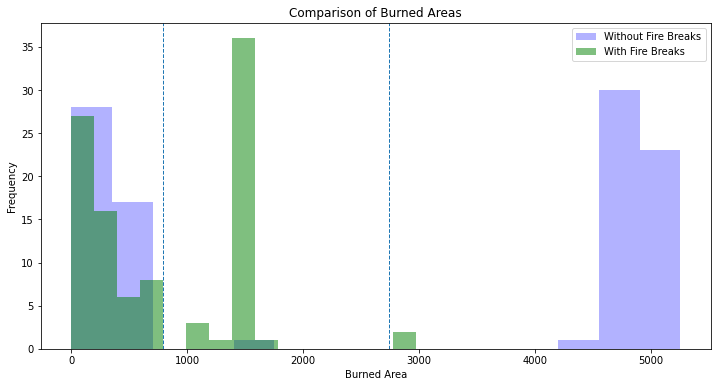

In [19]:

def run_fire_simulation(iterations=100):
    data_tile_region = data_tile[13000:13100, 22000:22100]
    wind = Wind(direction='S', strength=3)
    
    # Arrays to hold results
    burned_areas_with_breaks = []
    burned_areas_without_breaks = []

    for _ in tqdm(range(iterations)):
        # Without fire breaks
        sim_without_breaks = ForestFireMitigation(data_tile_region.copy(), wind)
        sim_without_breaks.start_fire()
        while not sim_without_breaks.fire_stopped_spreading():
            sim_without_breaks.update()
        sim_without_breaks.close_figure()
        burned_areas_without_breaks.append(sim_without_breaks.total_burned_area())


        sim_with_breaks = ForestFireMitigation(data_tile_region.copy(), wind)
        sim_with_breaks.create_fire_breaks()
        sim_with_breaks.start_fire()
        while not sim_with_breaks.fire_stopped_spreading():
            sim_with_breaks.update()
        sim_with_breaks.close_figure()
        burned_areas_with_breaks.append(sim_with_breaks.total_burned_area())

    # Calculate means and 95% confidence intervals
    mean_without = np.mean(burned_areas_without_breaks)
    mean_with = np.mean(burned_areas_with_breaks)
    median_without = np.median(burned_areas_without_breaks)
    median_with = np.median(burned_areas_with_breaks)
    ci_without = t.interval(0.95, len(burned_areas_without_breaks)-1, loc=mean_without, scale=sem(burned_areas_without_breaks))
    ci_with = t.interval(0.95, len(burned_areas_with_breaks)-1, loc=mean_with, scale=sem(burned_areas_with_breaks))
    print("Without intervention:")
    print(f"Mean Burned Area: {mean_without:.2f}")
    print(f"Median Burned Area: {median_without:.2f}")
    print(f"95% Confidence Interval: {ci_without}\n")

    print("With intervention:")
    print(f"Mean Burned Area: {mean_with:.2f}")
    print(f"Median Burned Area: {median_with:.2f}")
    print(f"95% Confidence Interval: {ci_with}")


    plt.figure(figsize=(12, 6))
    plt.hist(burned_areas_without_breaks, bins=15, alpha=0.3, color='blue', label='Without Fire Breaks')
    plt.hist(burned_areas_with_breaks,bins=15, alpha=0.5, color='green', label='With Fire Breaks')
    plt.axvline(mean_without, linestyle='dashed', linewidth=1)
    plt.axvline(mean_with, linestyle='dashed', linewidth=1)
    plt.legend()
    plt.title('Comparison of Burned Areas')
    plt.xlabel('Burned Area')
    plt.ylabel('Frequency')
    plt.show()
    

run_fire_simulation(100)


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from tqdm.notebook import tqdm

class Wind:
    def __init__(self, direction, strength):
        '''
        This class creates an instance of Wind object that can 
        
        ------------------
        Parameters:
        direction:
            The current wind direction, which can take any of the 8 potential options. 
            
        strength (int):
            The current wind strenght. 
        
        wind_directions (dict):
            Represents a dictionary containing 8 potnetial wind directions with the values being their coordinate changes
        '''
        self.direction = direction
        self.strength = strength
        self.wind_directions = {
            'N': (0, 1), 
            'S': (0, -1), 
            'E': (-1, 0), 
            'W': (1, 0),
            'NW': (-1, 1), 
            'SW': (-1, -1), 
            'NE': (1, 1), 
            'SE': (1, -1)
        }
        
    def change_wind_properties(self):
        '''
        This method allows for the randomness of the weather by changing the wind strength and direction
        with a 10% for each.
        Including  np.random.randint(-3, 3) allows for the decrease in the strength of the wind as well as the increase. 
        '''

        if np.random.random() < 0.1:
            self.direction = np.random.choice(list(self.wind_directions.keys()))
        if np.random.random() < 0.1:
            self.strength = max(0, self.strength + np.random.randint(-3, 3))

            
            
class ForestFireMitigation:
    no_fire, burning, charcoal = range(3)

    def __init__(self, tree_density_data, wind):
        '''
        This Class creates the instance of the simulation that allows to observe the spread of the fire 
        based on the neighborhood, wind strength, direction, and the direction of the adjacent cell. 
        
        ------------------
        Parameters:
        tree_density_grid (np.array):
            A grid where each cell has a corresponding tree density value, which is scaled down by dividing by 100. 
        width (int):
            A width of the grid that corresponds to the shape of the data tile. 
        height (int):
            A height of the grid that corresponds to the shape of the data tile. 
        config (np.array):
            Current states of the grid cells which do not take any state values as of now. 
        next_config (np.array):
            Temporary storage for the next state of the cells. 
        step_counter (int):
            A counter for the simulation steps. 
        new_burning_cells (list):
            Tracks the number of new cells that start burning at each step. 
        
        '''
        self.tree_density_grid = tree_density_data / 100  # converting percentage to a scale of 0 to 1
        self.width = tree_density_data.shape[1]
        self.height = tree_density_data.shape[0]
        self.wind = wind
        self.config = np.zeros((self.height, self.width), dtype=int)
        self.next_config = np.zeros_like(self.config)
        self.step_counter = 0
        self.figure, self.axes = plt.subplots(figsize=(10, 10))
        self.new_burning_cells = []

    def start_fire(self):
        '''   
        This method allows for the ignition of the random cell by chaning its state to burning
        '''
        x, y = np.random.randint(0, self.height), np.random.randint(0, self.width)
        self.config[x, y] = self.burning

    def fire_spread_probability(self, tree_density, dx, dy):
        
        '''
        Calculates the probability that a fire will spread to a neighboring cell based on 
        tree density and wind conditions.
         
        -----------------
        Parameters:
        tree_density (float): 
            Density of the tree in the neighboring cell ranging from 0 to 1 as a function of tree density.
        dx (int): 
            Horizontal distance (delta x) between the burning cell and the neighboring cell.
        dy (int): 
            Vertical distance (delta y) between the burning cell and the neighboring cell.

        Returns:
        final_probability (float)
            The calculated probability that the fire will spread to the neighboring cell.
        '''
        
        base_prob=next((item[1] for item in density_results if item[0] == tree_density))
        wind_dx, wind_dy = self.wind.wind_directions[self.wind.direction]
        wind_magnitude = (wind_dx**2 + wind_dy**2)**0.5
        normalized_wind_dx = wind_dx / wind_magnitude # normalizing the wind vector x component
        normalized_wind_dy = wind_dy / wind_magnitude # normalizing the wind vector y component
        alignment_factor = normalized_wind_dx * dx + normalized_wind_dy * dy # alignment of wind and cell direction
        wind_adjustment_rate = 0.1 * self.wind.strength * alignment_factor # wind's effect on spread probability        
        final_probability = base_prob * (1 + wind_adjustment_rate)
        return final_probability

    def update(self):
        '''
        Update the forest fire simulation by one step: changing wind properties, spreading the fire, and updating cell states.

        This method simulates the progression of a forest fire for a single time step. It updates the wind properties,
        checks each cell to see if it is burning, and attempts to spread the fire to neighboring cells based on
        the calculated probabilities.
        
        '''

        self.wind.change_wind_properties()
        new_burning_count = 0
        self.next_config[:, :] = self.config
        for x in range(self.height):
            for y in range(self.width):
                if self.config[x, y] == self.burning: # check if the current cell is burning
                    self.next_config[x, y] = self.charcoal
                    for dx in range(-1, 2): #iterate over the moore neighborhood of 8 cells
                        for dy in range(-1, 2):
                            if dx == 0 and dy == 0:
                                continue
                            nx, ny = (x + dx), (y + dy)
                            if 0 <= nx < self.height and 0 <= ny < self.width and self.config[nx, ny] == self.no_fire:
                                spread_prob = self.fire_spread_probability(self.tree_density_grid[nx, ny], dx, dy)
                                if np.random.random() < spread_prob:
                                    self.next_config[nx, ny] = self.burning # set the cell to burning if the probability check passes
                                    new_burning_count += 1 # increment the count of new burning cells
        self.new_burning_cells.append(new_burning_count)
        self.config, self.next_config = self.next_config, np.zeros_like(self.config)
        self.step_counter += 1
        
    def plot_fire_spread_rate(self):
        '''
        Plot the rate of new burning cells over the simulation time which allows to see 
        the rate of the fire spread.
        
        '''
        plt.figure(figsize=(10, 8))
        plt.plot(self.new_burning_cells, color = "navy", label='New Burning Cells per Step')
        plt.xlabel('Simulation Step')
        plt.ylabel('Number of New Burning Cells')
        plt.title('Fire Growth Rate Over Time')
        plt.legend()
        plt.show()


    def cells_at_risk(self):
        '''
        This method calculates and return a grid of cells that are at risk of catching fire or are burning.
        As defined in the instructions of the assignment, the cells at risk are the ones who are burnt or 
        the adjacent cells to the burnt ones. 
        
        '''
        #calculate all the burnt cells and the adjacent cells to it as affected or at risk
        affected_area = np.zeros_like(self.config, dtype=bool)
        charcoal_cells = np.where(self.config == self.charcoal)
        affected_area[charcoal_cells] = True

        # marking all neighboring cells of burnt cells as affected
        for x, y in zip(*charcoal_cells):
            for dx in range(-1, 2): 
                for dy in range(-1, 2): 
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < self.width and 0 <= ny < self.height:
                        affected_area[nx, ny] = True

        cells_at_risk_count = np.sum(affected_area)
        return affected_area

    
    def observe(self):
        '''
        Plots the current state of the forest fire on the grid.
        '''
        self.axes.clear()
        plot = self.axes.imshow(self.config, cmap='gist_heat')
        self.axes.set_title(f"Forest Fire Simulation Step: {self.step_counter}")
        return plot

    
    def total_burned_area(self):
        '''
        Calculates and returns the total area that has been burned which is defined by the state
        of the cell being set to "charcoal"
        '''
        return np.sum(self.config == self.charcoal)
    
    
    def fire_stopped_spreading(self):
        '''
        Check if the fire has stopped spreading by checking the status of each cell, and checking whether 
        none of them is "burning"
        '''
        return not np.any(self.config == self.burning)

    def close_figure(self):
        '''
        This method closes the matplotlib figure to avoid a lot of plots
        '''
        plt.close(self.figure)

    def create_fire_breaks(self):
        for i in range(0, self.height, 30):
            self.tree_density_grid[i, :] = 0
        for j in range(0, self.width, 30):
            self.tree_density_grid[:, j] = 0
        
        
def make_animation(sim, total_frames, steps_per_frame=1, interval=100):
    def update(frame_number):
        for _ in range(steps_per_frame):
            sim.update()
        progress_bar.update(1)
        return [sim.observe()]

    sim.start_fire()
    progress_bar = tqdm(total=total_frames)
    animation = FuncAnimation(sim.figure, update, init_func=lambda: [], frames=total_frames, interval=interval)
    output = HTML(animation.to_html5_video())
    sim.figure.clf()
    return output

    

data_tile_region = data_tile[13000:13100, 22000:22100]
wind = Wind(direction='S', strength=3)
sim = ForestFireMitigation(data_tile_region, wind)
make_animation(sim, total_frames=100, steps_per_frame=1)

  0%|          | 0/100 [00:00<?, ?it/s]

<Figure size 720x720 with 0 Axes>

# Comparing Strategy 2 and No Intervention
### Building fire breaks at every 30th row and 30th column

  0%|          | 0/100 [00:00<?, ?it/s]

Without intervention:
Mean Burned Area: 3433.15
Median Burned Area: 4586.50
95% Confidence Interval: (3008.4914987595316, 3857.8085012404686)

With intervention:
Mean Burned Area: 345.87
Median Burned Area: 467.50
95% Confidence Interval: (297.7979094423092, 393.9420905576908)


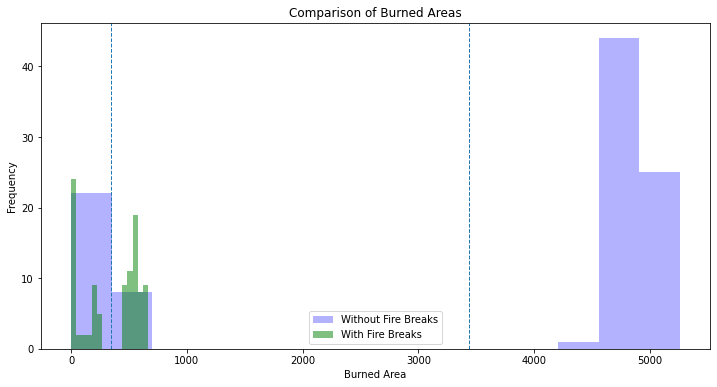

In [21]:
#fire bleaks set at every 30th column and row 


def run_fire_simulation(iterations=100):
    # Define wind and initial data setup
    data_tile_region = data_tile[13000:13100, 22000:22100]
    wind = Wind(direction='S', strength=3)
    
    # Arrays to hold results
    burned_areas_with_breaks = []
    burned_areas_without_breaks = []

    for _ in tqdm(range(iterations)):
        # Without fire breaks
        sim_without_breaks = ForestFireMitigation(data_tile_region.copy(), wind)
        sim_without_breaks.start_fire()
        while not sim_without_breaks.fire_stopped_spreading():
            sim_without_breaks.update()
        sim_without_breaks.close_figure()
        burned_areas_without_breaks.append(sim_without_breaks.total_burned_area())


        sim_with_breaks = ForestFireMitigation(data_tile_region.copy(), wind)
        sim_with_breaks.create_fire_breaks()
        sim_with_breaks.start_fire()
        while not sim_with_breaks.fire_stopped_spreading():
            sim_with_breaks.update()
        sim_with_breaks.close_figure()
        burned_areas_with_breaks.append(sim_with_breaks.total_burned_area())

    # Calculate means and 95% confidence intervals
    mean_without = np.mean(burned_areas_without_breaks)
    mean_with = np.mean(burned_areas_with_breaks)
    median_without = np.median(burned_areas_without_breaks)
    median_with = np.median(burned_areas_with_breaks)
    ci_without = t.interval(0.95, len(burned_areas_without_breaks)-1, loc=mean_without, scale=sem(burned_areas_without_breaks))
    ci_with = t.interval(0.95, len(burned_areas_with_breaks)-1, loc=mean_with, scale=sem(burned_areas_with_breaks))
    print("Without intervention:")
    print(f"Mean Burned Area: {mean_without:.2f}")
    print(f"Median Burned Area: {median_without:.2f}")
    print(f"95% Confidence Interval: {ci_without}\n")

    print("With intervention:")
    print(f"Mean Burned Area: {mean_with:.2f}")
    print(f"Median Burned Area: {median_with:.2f}")
    print(f"95% Confidence Interval: {ci_with}")


    plt.figure(figsize=(12, 6))
    plt.hist(burned_areas_without_breaks, bins=15, alpha=0.3, color='blue', label='Without Fire Breaks')
    plt.hist(burned_areas_with_breaks,bins=15, alpha=0.5, color='green', label='With Fire Breaks')
    plt.axvline(mean_without, linestyle='dashed', linewidth=1)
    plt.axvline(mean_with, linestyle='dashed', linewidth=1)
    plt.legend()
    plt.title('Comparison of Burned Areas')
    plt.xlabel('Burned Area')
    plt.ylabel('Frequency')
    plt.show()
    

run_fire_simulation(100)